# Práctica 2 Visión por Computador
## Autores:
- Héctor Wood Santana
- Alejandro Viera Ruiz 

Paquetes necesarios.

In [2]:
import cv2  
import numpy as np
import matplotlib.pyplot as plt

### Tarea 1: 
Realiza la cuenta de píxeles blancos por filas (en lugar de por columnas). Determina el valor máximo de píxeles blancos para filas, maxfil, mostrando el número de filas y sus respectivas posiciones, con un número de píxeles blancos mayor o igual que 0.95*maxfil.

#### Desglose:
- 1º: Buscar la fila/columna con la mayor cantidad de pixeles blancos. Decir la cantidad y el índice de la fila/columna.
- 2º: Numero de filas/columnas que poseen 0.95*max de pixeles blancos.

(0.0, 512.0)

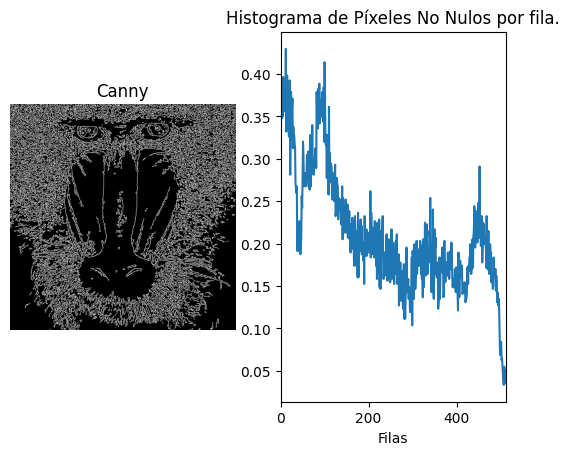

In [13]:
# Leemos la imagen
img = cv2.imread('./Material_P2/mandril.jpg')

#Comprobamos si hay lectura correcta y la convertimos a escala de grises
if img is not None:
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
else: 
    print('Imagen no encontrada')

# Obtenemos los contornos con Canny
canny_img = cv2.Canny(gray_img, 100, 200)

# Contamos el número de píxeles blancos por fila.
row_counts = cv2.reduce(canny_img, 1, cv2.REDUCE_SUM, dtype=cv2.CV_32SC1)

# Normalizamos el resultado para conocer la cantidad de pixeles blancos por fila.
rows = row_counts[:,0] / (255 * canny_img.shape[0])

# Mostramos los resultados
plt.figure()
plt.subplot(1, 2, 1)
plt.axis("off")
plt.title("Canny")
plt.imshow(canny_img, cmap='gray')

plt.subplot(1, 2, 2)
plt.title("Histograma de Píxeles No Nulos por fila.")
plt.xlabel("Filas")
plt.ylabel("% píxeles")
plt.plot(rows)

plt.xlim([0, canny_img.shape[0]])

In [10]:
row_counts_adjusted = row_counts[:, 0] / 255

row_max = np.max(row_counts_adjusted)
row_min =np.min(row_counts_adjusted)

print("Cantidad máxima de pixeles blancos en una fila: " ,row_max)
print("Cantidad minima de pixeles blancos en una fila: ", row_min)

index_row_max = np.argmax(row_counts_adjusted)
index_row_min = np.argmin(row_counts_adjusted)

print("Índice de la fila que contiene el máximo: " , index_row_max)
print("Índice de la fila que contiene el máximo: ", index_row_min)

rows_max_95 = row_counts_adjusted >= (0.95 * row_max)

print("Número de filas con 95% del máximo: ", np.sum(rows_max_95))


Cantidad máxima de pixeles blancos en una fila:  220.0
Cantidad minima de pixeles blancos en una fila:  17.0
Índice de la fila que contiene el máximo:  12
Índice de la fila que contiene el máximo:  507
Número de filas con 95% del máximo:  2


### Tarea 2: 
Aplica umbralizado a la imagen resultante de Sobel (convertida a 8 bits), y posteriormente realiza el conteo por filas y columnas similar al realizado en el ejemplo con la salida de Canny de píxeles no nulos. Calcula el valor máximo de la cuenta por filas y columnas, y determina las filas y columnas por encima del 0.95*máximo. Remarca con alguna primitiva gráfica dichas filas y columnas sobre la imagen. ¿Cómo se comparan los resultados obtenidos a partir de Sobel y Canny?

#### Desglose:
- 1º: Generar una imagen de Sobel convertida a 8 bits.
- 2º: Unbralizar la imagen obtenida.
- 3º: Realizar un conteo por *filas* y por *columnas* como el realizado en la tarea anterior.
- 4º: Determinar las filas y columnas por encima del 95% del máximo.
- 5º: Remarcar en la imagen dichas filas y columnas.

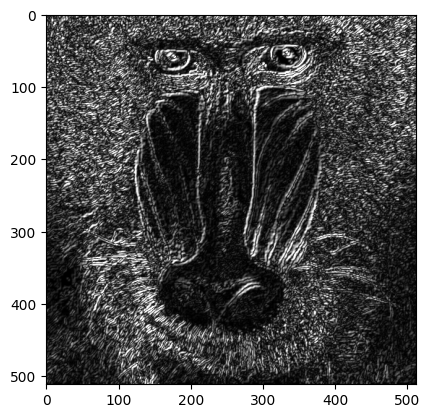

In [31]:
gray_s_img = cv2.GaussianBlur(gray_img, (3, 3), 0)

sobelx = cv2.Sobel(gray_s_img, cv2.CV_64F, 1, 0)
sobely = cv2.Sobel(gray_s_img, cv2.CV_64F, 0, 1)
sobel = cv2.add(sobelx, sobely)

sobel8_CV2 = cv2.convertScaleAbs(sobel)

plt.imshow(sobel8_CV2, cmap='gray')
plt.show()

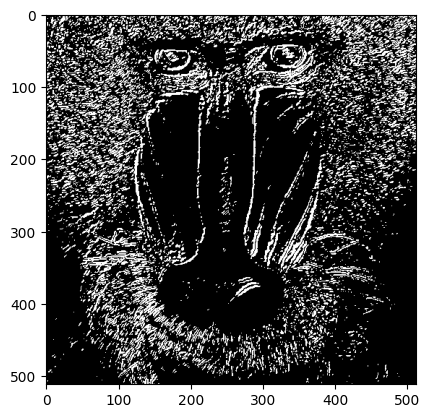

In [30]:
umbral_value = 100

res, umbral_img = cv2.threshold(sobel8_CV2, umbral_value, 255, cv2.THRESH_BINARY)

plt.imshow(umbral_img, cmap='gray')
plt.show()